In [32]:
import numpy as np
import matplotlib.pyplot as plt

## March 1991 
* value of slow learner -> but nobody wants to be a slow learner in an organization -> paradox 
    * can we solve this paradox? namely agents converge at organization code quickly and meanwhile organization code converge at reality 
    * the value of slow learner is realized by fast learners 
    
* volitional learner
    * below aspiration -> faster learner -> less value creation 
    * above aspiration -> slower learner -> less value realization 
  

In [77]:
def similarityCount(x1, x2):
    res = 0
    for cur in range(len(x1)):
        if x1[cur]==x2[cur]:
            res+=1
    return res

def get_dominant_belief(xs):
    dic = {cur:[0, 0, 0] for cur in range(len(xs[0]))}
    
    for x in xs:
        for cur in range(len(x)):
            if x[cur]==-1:
                dic[cur][0]+=1
            elif x[cur]==0:
                dic[cur][1]+=1
            else:
                dic[cur][2]+=1
    res = []
    
    for cur in range(len(xs[0])):
        index = dic[cur].index(max(dic[cur]))
        if index==0:
            res.append(-1)
        elif index==1:
            res.append(0)
        else:
            res.append(1)
    return res

In [135]:
class Reality:
    
    def __init__(self, element_num):
        self.element_num = element_num
        self.state = np.random.choice([-1, 1], self.element_num, p=[0.5, 0.5])
    
    def change_state(self,):
        self.state = np.random.choice([-1, 1], self.element_num, p=[0.5, 0.5])
    
    
class Individual:
    
    def __init__(self, element_num, p1):
        self.element_num = element_num
        self.belief = np.random.choice([-1, 0, 1], self.element_num, p=[1/3, 1/3, 1/3])
        self.socialization_rate = p1
        
    def socialization(self, code):
        belief = list(self.belief)
        
        res = []
        
        if np.random.uniform(0, 1)<0.5:
            learn_tag = True
        else:
            learn_tag = False
        
        if learn_tag:
            for cur in range(len(code)):
                if code[cur]==0:
                    res.append(belief[cur])
                else:
                    if np.random.uniform(0, 1) < self.socialization_rate:
                        res.append(code[cur])
                    else:
                        res.append(belief[cur])
            self.belief = list(res)
    
    def volitional_socialization(self, code, peers, upper=0.1, lower=0.9):
        social_aspiration = np.mean([similarityCount(individual.belief, code) for individual in peers])
        focal_similarity = similarityCount(self.belief, code)
        
        learn_tag = False
        if focal_similarity>social_aspiration:
            if np.random.uniform(0, 1) < upper:
                learn_tag = True
        else:
            if np.random.uniform(0, 1) < lower:
                learn_tag = True
        if learn_tag:
            belief = list(self.belief)
        
            res = []

            for cur in range(len(code)):
                if code[cur]==0:
                    res.append(belief[cur])
                else:
                    if np.random.uniform(0, 1) < self.socialization_rate:
                        res.append(code[cur])
                    else:
                        res.append(belief[cur])
            self.belief = list(res)
        
class Organization:
    
    def __init__(self, element_num, individuals, p2):
        self.element_num = element_num
        self.code = np.random.choice([0], self.element_num)
        self.individuals = individuals
        self.adaptation_rate = p2
        
    def calculate_k(self, superior_group):
        res = []
        for cur in range(self.element_num):
            k = 0
            
            for individual in superior_group:
                if individual.belief[cur]==self.code[cur]:
                    k-=1
                else:
                    k+=1
            res.append(k)
        return res
    
    def turnover(self, p3):
        
        individuals = list(self.individuals)
        socialization_rate = individuals[0].socialization_rate
        res = []
        for cur in range(len(individuals)):
            if np.random.uniform(0, 1) < p3:
                res.append(Individual(30, socialization_rate))
            else:
                res.append(individuals[cur])
        self.individuals = list(res)
        
        
    def adaptation(self, reality_code):
        
        organization_similarity = similarityCount(self.code, reality_code)
        
        superior_group = []
        
        for individual in self.individuals:
            
            individual_similarity = similarityCount(individual.belief, reality_code)
            
            if individual_similarity > organization_similarity:
                superior_group.append(individual)

        if len(superior_group)==0:
            return
        else:
            dominant_belief = get_dominant_belief([individual.belief for individual in superior_group])
            
        ks = self.calculate_k(superior_group)
            
        code = list(self.code)
        
        res = []
        
        for cur in range(len(code)):

            if np.random.uniform(0, 1)>pow((1-self.adaptation_rate),ks[cur]):
                res.append(dominant_belief[cur])
            else:
                res.append(code[cur])
        self.code = list(res)
        
    def knowledge_equivalence(self, reality_code):
        
        res = 0
        
        for cur in range(len(self.code)):
            if self.code[cur]==reality_code[cur]:
                res+=1
        return res/len(self.code)
        

In [136]:
ress = []

for p1 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for p2 in [0.1, 0.5, 0.9]:
        
        print(p1, p2)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                individuals.append(Individual(30, p1))
            organization = Organization(30, individuals, p2)

            long_res = []

            for period in range(100):

                for individual in organization.individuals:
                    individual.socialization(organization.code)
                organization.adaptation(reality.state)
                long_res.append(organization.knowledge_equivalence(reality.state))
            repeat_res.append(long_res)
        ress.append(repeat_res)
        

0.1 0.1
0.1 0.5
0.1 0.9
0.2 0.1
0.2 0.5
0.2 0.9
0.3 0.1
0.3 0.5
0.3 0.9
0.4 0.1
0.4 0.5
0.4 0.9
0.5 0.1
0.5 0.5
0.5 0.9
0.6 0.1
0.6 0.5
0.6 0.9
0.7 0.1
0.7 0.5
0.7 0.9
0.8 0.1
0.8 0.5
0.8 0.9
0.9 0.1
0.9 0.5
0.9 0.9


In [ ]:
# volitional_socialization(self, code, peers, upper=0.1, lower=0.9)

In [124]:
ress_volitional = []

for p1 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for p2 in [0.1, 0.5, 0.9]:
        
        print(p1, p2)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                individuals.append(Individual(30, p1))
            organization = Organization(30, individuals, p2)

            long_res = []

            for period in range(100):

                for individual_index, individual in enumerate(organization.individuals):
                    individual.volitional_socialization(
                        organization.code, [organization.individuals[cur] for cur in range(50) if cur!=individual_index]
                    )
                organization.adaptation(reality.state)
                long_res.append(organization.knowledge_equivalence(reality.state))
            repeat_res.append(long_res)
        ress_volitional.append(repeat_res)
        

0.1 0.1
0.1 0.5
0.1 0.9
0.2 0.1
0.2 0.5
0.2 0.9
0.3 0.1
0.3 0.5
0.3 0.9
0.4 0.1
0.4 0.5
0.4 0.9
0.5 0.1
0.5 0.5
0.5 0.9
0.6 0.1
0.6 0.5
0.6 0.9
0.7 0.1
0.7 0.5
0.7 0.9
0.8 0.1
0.8 0.5
0.8 0.9
0.9 0.1
0.9 0.5
0.9 0.9


####  Learning Speed

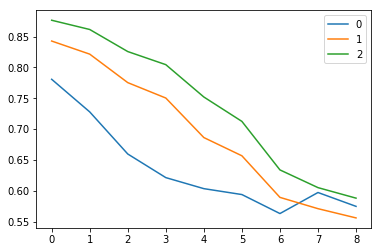

In [137]:
for p2 in range(3):
    temp = []
    for p1 in range(9):
        index = p1*3 + p2
        
        temp.append(np.mean(np.array(ress[index])[:, -1], axis=(0)))
    plt.plot(temp, label=str(p2))
plt.legend()
        

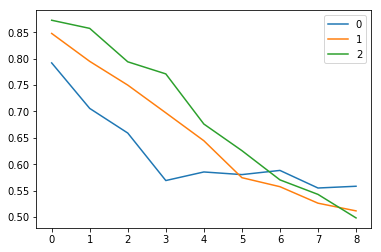

In [138]:
for p2 in range(3):
    temp = []
    for p1 in range(9):
        index = p1*3 + p2
        
        temp.append(np.mean(np.array(ress_volitional[index])[:, -1], axis=(0)))
    plt.plot(temp, label=str(p2))
plt.legend()

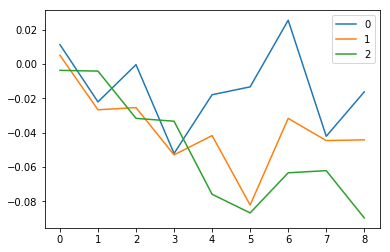

In [139]:
for p2 in range(3):
    temp = []
    for p1 in range(9):
        index = p1*3 + p2
        
        temp.append(
            np.mean(np.array(ress_volitional[index])[:, -1], axis=(0))-np.mean(np.array(ress[index])[:, -1], axis=(0))
        )
    plt.plot(temp, label=str(p2))
plt.legend()

In [128]:
ress_hetero = []

for p1 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for p2 in [0.5,]:
        
        print(p1)
        
        proportion_y = (p1*10-1)/8
        proportion_x = 1-proportion_y
        
        type_x = int(50*proportion_x)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                if cur < type_x:
                    individuals.append(Individual(30, 0.1))
                else:
                    individuals.append(Individual(30, 0.9))
            organization = Organization(30, individuals, p2)

            long_res = []

            for period in range(100):

                for individual in organization.individuals:
                    individual.socialization(organization.code)
                organization.adaptation(reality.state)
                long_res.append(organization.knowledge_equivalence(reality.state))
            repeat_res.append(long_res)
        ress_hetero.append(repeat_res)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [129]:
ress_volitional_hetero = []

for p1 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for p2 in [0.5,]:
        
        print(p1)
        
        proportion_y = (p1*10-1)/8
        proportion_x = 1-proportion_y
        
        type_x = int(50*proportion_x)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                if cur < type_x:
                    individuals.append(Individual(30, 0.1))
                else:
                    individuals.append(Individual(30, 0.9))
            organization = Organization(30, individuals, p2)

            long_res = []

            for period in range(100):

                for individual_index, individual in enumerate(organization.individuals):
                    individual.volitional_socialization(
                        organization.code, [organization.individuals[cur] for cur in range(50) if cur!=individual_index]
                    )
                organization.adaptation(reality.state)
                long_res.append(organization.knowledge_equivalence(reality.state))
            repeat_res.append(long_res)
        ress_volitional_hetero.append(repeat_res)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


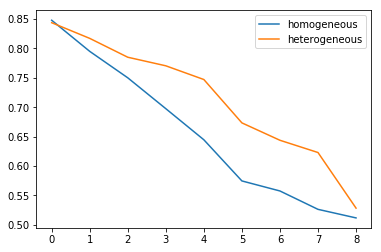

In [131]:
for p2 in range(1, 2):
    temp = []
    for p1 in range(9):
        index = p1*3 + p2
        
        temp.append(np.mean(np.array(ress_volitional[index])[:, -1], axis=(0)))
    plt.plot(temp, label="homogeneous")
temp = []
for p1 in range(9):
    temp.append(np.mean(np.array(ress_volitional_hetero[p1])[:, -1], axis=(0)))
plt.plot(temp, label="heterogeneous")
plt.legend()

#### Homogeneous Learners

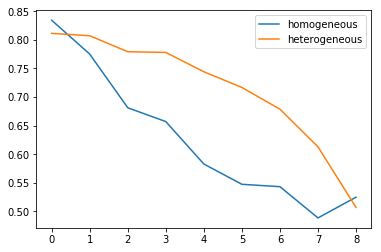

In [130]:
for p2 in range(1, 2):
    temp = []
    for p1 in range(9):
        index = p1*3 + p2
        
        temp.append(np.mean(np.array(ress[index])[:, -1], axis=(0)))
    plt.plot(temp, label="homogeneous")
temp = []
for p1 in range(9):
    temp.append(np.mean(np.array(ress_hetero[p1])[:, -1], axis=(0)))
plt.plot(temp, label="heterogeneous")
plt.legend()
        

In [108]:
ress_turnover = []

for p1 in [0.1, 0.9]:
    for p3 in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        
        print(p1, p3)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                individuals.append(Individual(30, p1))
                    
            organization = Organization(30, individuals, 0.5)

            long_res = []

            for period in range(100):
                
                organization.turnover(p3)
                
                for individual in organization.individuals:
                    individual.socialization(organization.code)
                organization.adaptation(reality.state)
                
                long_res.append(organization.knowledge_equivalence(reality.state))

                repeat_res.append(long_res)
        ress_turnover.append(repeat_res)

0.1 0
0.1 0.1
0.1 0.2
0.1 0.3
0.1 0.4
0.1 0.5
0.1 0.6
0.1 0.7
0.1 0.8
0.1 0.9
0.9 0
0.9 0.1
0.9 0.2
0.9 0.3
0.9 0.4
0.9 0.5
0.9 0.6
0.9 0.7
0.9 0.8
0.9 0.9


In [111]:
len(ress_turnover)

20

####  turnover

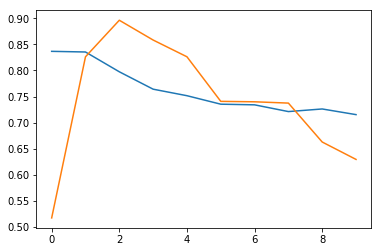

In [116]:
for p1 in range(2):
    temp = []
    for p3 in range(10):
        index = p1*10 + p3        
        temp.append(np.mean(np.array(ress_turnover[index])[:, 50], axis=(0)))
    plt.plot(temp)

In [121]:
ress_turbulence = []

for p3 in [0, 0.1]:
    for p4 in [0.02]:
        
        print(p3, p4)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                individuals.append(Individual(30, 0.5))
                    
            organization = Organization(30, individuals, 0.5)

            long_res = []

            for period in range(100):
                
                if np.random.uniform(0, 1)<p4:
                    reality.change_state()
                organization.turnover(p3)
                
                for individual in organization.individuals:
                    individual.socialization(organization.code)
                organization.adaptation(reality.state)
                
                long_res.append(organization.knowledge_equivalence(reality.state))

                repeat_res.append(long_res)

        ress_turbulence.append(repeat_res)

0 0.02
0.1 0.02


In [133]:
ress_volitional_turbulence = []

for p3 in [0, 0.1]:
    for p4 in [0.02]:
        
        print(p3, p4)

        repeat_res = []

        for repeat in range(80):

            reality = Reality(30)
            individuals = []
            for cur in range(50):
                individuals.append(Individual(30, 0.5))
                    
            organization = Organization(30, individuals, 0.5)

            long_res = []

            for period in range(100):
                
                if np.random.uniform(0, 1)<p4:
                    reality.change_state()
                organization.turnover(p3)
                
                for individual_index, individual in enumerate(organization.individuals):
                    individual.volitional_socialization(
                        organization.code, [organization.individuals[cur] for cur in range(50) if cur!=individual_index]
                    )
                    
                organization.adaptation(reality.state)
                
                long_res.append(organization.knowledge_equivalence(reality.state))

                repeat_res.append(long_res)

        ress_volitional_turbulence.append(repeat_res)

0 0.02
0.1 0.02


#### turbulence

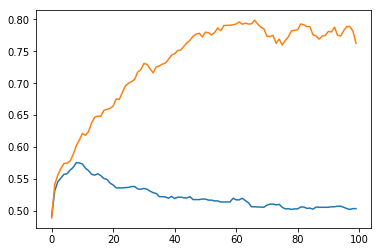

In [122]:
for index in range(2):
    plt.plot(np.mean(np.array(ress_turbulence[index]),axis=0))

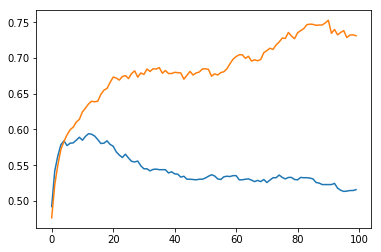

In [134]:
for index in range(2):
    plt.plot(np.mean(np.array(ress_volitional_turbulence[index]),axis=0))